In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

## 연속형 확률변수
<br>

- 이산형 확률변수와 연속형 확률변수의 주된 차이는<br>확률변수가 취할 수 있는 값이 이산적인가 또는 연속적인가의 여부이다.<br>
- 연속형 확률변수의 경우 계산 과정에 적분이 포함된다.<br>적분은 Scipy의 integral 모듈을 사용하여 구현한다.<br>
- 연속형 확률변수의 정확한 확률값은 구할 수 없고, 해당 구간에 속할 확률을 구한다.<br>

In [2]:
x_range = np.array([0,1])

def f(x):
    # x과 0과 1사이의 무언가라면 그 2배를 리턴하는 함수
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else: return 0
X = [x_range, f] 

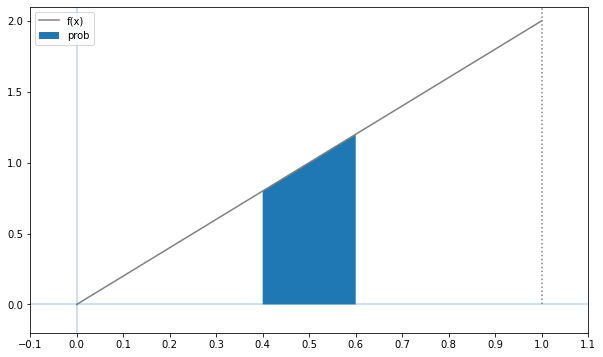

In [3]:
xs = np.linspace(x_range[0],x_range[1],100) # 0과 1 사이를 100개로 나눔
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs,[f(x) for x in xs], label='f(x)',color='gray')
ax.hlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(),0,2.2, linestyles=':',color='gray')
# 0.4~0.6에 x 좌표 세팅
xs = np.linspace(0.4,0.6,100)
ax.fill_between(xs, [f(x) for x in xs], label='prob')
ax.set_xticks(np.arange(-0.2,1.3,0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.2,2.1)
ax.legend()
plt.show()
# 삼각형 전체 면적은 1임. 전체 확률이 1이라는 말임.

In [4]:
# 적분값과 추정오차를 반환하는 integrate의 quad 함수
integrate.quad(f, 0.4,0.6) # (피적분함수,적분범위 a,b)
# (확률, 추정오차)

(0.19999999999999996, 2.2204460492503127e-15)

연속형 확률변수에서는 확률의 성질이 수식을 만족해야 함
- f(x)가 항상 0 이상의 값을 취한다. (= 확률은 음수가 아니다)
- f(x)에 대하여 무한대 범위의 적분 결과는 1이다. (= 확률의 총합은 1이다)
<br>

연속형 확률분포와 확률밀도함수
- 특정 값이 될 확률은 0<br>특정 값이 해당 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산<br>(적분은 선 아래 면적의 넓이)
- 정규분포는 연속확률분포로, 가장 자주 쓰이는 확률분포이다.<br>모양은 평균을 중심으로 좌우대칭이며, 하나의 봉우리 형태를 띈다.<br>한 집단의 키, 몸무게, 시험 성적등의 데이터에 잘 나타나는 분포이다.
- 누적분포함수(Cumulative density function): <br>예시) 확률분포에서 얻은 확률변수가 3 이하가 될 확률(시작점은 -∞)
    * stats.norm.cdf(loc=4, scale=0.8,x=3)
- 정규분포일 때의 확률밀도 계산
    * 확률변수 3일 때의 확률밀도 N(3|4, 0.8**2)
    * stats.norm.pdf(loc=4, scale=0.8, x=3) (PDF: probability density function)
- 하측확률: '확률변수 x가 N보다 낮을 확률은 M%이다'에서<br>N을 고정하고 M을 구하는 경우, 이때의 M이 하측확률이다.
    * M(확률)을 고정하고 N(변수)을 구하는 경우<br>예시) 이때의 N이 퍼센트 포인트 하측확률이 2.5%가 되는 퍼센트 포인트를 구하시오.
- stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 정규분포가 됨
- stats.norm.rvs() 함수는 정규확률분포로부터 난수 생성

In [5]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun # 함수의 최솟값은 fun이라는 인스턴스 변수에 저장

0

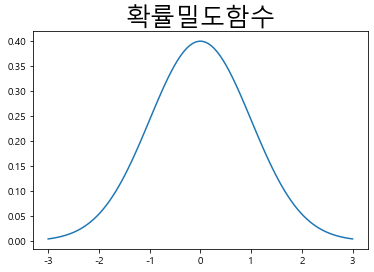

In [6]:
import matplotlib
rv = stats.norm() # loc=0, scale=1, 편차가 크면 그래프가 벌어진다.
matplotlib.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
xx = np.linspace(-3,3,100)
pdf = rv.pdf(xx)
plt.figure(figsize=(6,4))
plt.plot(xx,pdf)
plt.title('확률밀도함수',fontsize=25)
plt.show()

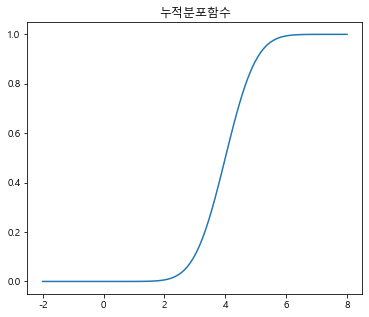

In [7]:
# 누적분포함수 그래프 그리기
xx = np.linspace(-2,8,100)
rv = stats.norm(loc=4, scale=0.8)
cdf = rv.cdf(xx)
plt.figure(figsize=(6,5))
plt.plot(xx,cdf)
plt.title('누적분포함수')
plt.show()

In [8]:
integrate.quad(f, -np.inf, np.inf)[0]
# 면적의 전체 넓이는 확률의 총합 = 1

1.0

0.14332291325560537


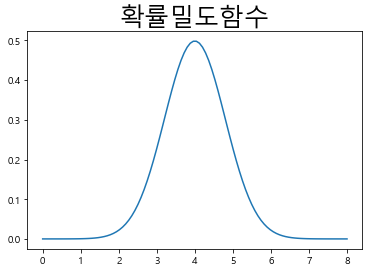

0.2283113567362774

In [9]:
# 정규분포의 확률밀도 계산
# 확률변수 3일 때의 확률밀도
# loc=4, scale=0.8인 정규분포라고 가정
# N(3|4, 0.8**2)
x=3
mu = 4
sigma = 0.8

# 수식으로 구하기
print(1/(np.sqrt(2*np.pi) * sigma)*np.exp(-((x-mu)**2))/(2*sigma**2))

# 시각화
rv = stats.norm(4,0.8) 
matplotlib.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
xx = np.linspace(0,8,100)
pdf = rv.pdf(xx)
plt.figure(figsize=(6,4))
plt.plot(xx,pdf)
plt.title('확률밀도함수',fontsize=25)
plt.show()

# 함수 사용
display(stats.norm.pdf(loc=4,scale=0.8,x=3))

In [10]:
# [연습문제] 표준정규분포에서 x가 1일때의 확률밀도 함수를 구하시오
st = stats.norm()
st.pdf(x=1)
# stats.norm.pdf(loc=0,scale=1,x=1) 도 가능~

0.24197072451914337

In [11]:
# 정규분포 객체(인스턴스)를 생성
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

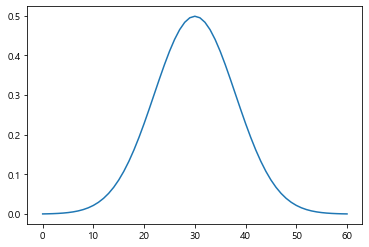

In [12]:
# x축을 줄게. 정규분포 그래프를 그려봐.
x_plot = np.arange(1,7.1, 0.1)
st = stats.norm(loc=4,scale=0.8)
plt.plot(st.pdf(x_plot))
plt.show()

In [13]:
# 표본이 어떤 값 이하가 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4, scale=0.8, size=100000)
simulated_sample[:10]

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [14]:
pd.Series(simulated_sample).describe().round(3)
# 평균이 4, 표준편차가 0.8인 것을 의도했었다.

count    100000.000
mean          4.004
std           0.799
min           0.538
25%           3.466
50%           4.005
75%           4.540
max           7.334
dtype: float64

In [15]:
# [연습문제] 3보다 작은 샘플의 합계와 확률은?
display(simulated_sample[simulated_sample<3].sum(),
        len(simulated_sample[simulated_sample<3])/len(simulated_sample))
# 배열에서 해당 수들이 등장할 확률을 구하는 거니까
# 해당 수의 비율을 확인하면 되겠지? 

27151.549504137874

0.10371

In [16]:
# 누적분포함수: 확률분포에서 얻은 확률변수가 3 이하가 될 확률
# cumulative density function 이니까 cdf!
rv = stats.norm(loc=4, scale=0.8)
rv.cdf(3)
# stats.norm.cdf(loc=4, scale=0.8, x=3) 해도 쌉가능~

0.10564977366685535

In [17]:
# 정규분포는 평균에 대해 좌우대칭
# 데이터가 평균값 이하가 될 확률은 50%(0.5)
stats.norm.cdf(0) # loc=0 이니까 0을 입력했지~ loc랑 x를 같게 하면 됨!

0.5

In [18]:
# 하측확률 -> 퍼센트포인트
# 하측확률: [확률변수 x가 N보다 작을 확률은 M%이다]
#          ...에서, M을 고정하고 N을 구한다.
#          누적분포함수의 면적값이 q가 되는 때의 확률변수 x를 알려줌
# percent point function - PPF
# 누적확률이 q값을 갖는 확률변수의 값을 알려줍니다.
stats.norm.ppf(loc=4, scale=0.8, q=0.025) # q가 하측확률

2.4320288123679563

In [19]:
# 퍼센트포인트 -> 하측확률
# 역으로 검증해 보자고.
# 확률변수가 2.43...과 같을 때의 면적값(확률)을 보면 되겠지?
stats.norm.cdf(loc=4, scale=0.8, x=2.4320288123679563)
# 거의 비슷하지?

0.024999999999999977

In [20]:
# 하측확률이 50%가 되는 퍼센트포인트는 평균과 일치
stats.norm.ppf(0.5) # 평균이 0이니까 0이 나왔지~ loc를 변경하면 loc 값이 나온다.

0.0

## 대표적인 연속형 확률분포

In [21]:
# 함수 만들고 시작합쉬다~
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

linestyles=['-','--',':']

def E(X, g=lambda x:x):
    x_range, f = X
    def integrand(x): # integrand - 피적분함수
        return g(x)*f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean)**2 *f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >=0, '밀도함수는 음수가 될 수 없습니다.'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0],6)
    assert prob_sum ==1, f'확률의 총합이 1이 아닙니다. 현재 총합: {prob_sum}'
    print(f'기댓값: {E(X):.3f}')
    print(f'분산: {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0] # 누적분포함수
    xs = np.linspace(x_min, x_max, 100)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray') # 확률밀도함수
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--', color = 'gray')
    ax.legend()
    plt.show()

### 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현.<br>가우스(Gaussian) 분포라고도 부른다.
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 평균과 분산, 두 가지이다.
- N(평균, 분산)이면 N(평균, 표준편차$^2$)로 표기한다.

In [22]:
def N(mu, sigma): # 함수 만들 땐 표준편차를 넣긴 했는데 N(a,b)로 표기할 땐 b는 분산임.
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/(np.sqrt(2*np.pi) * sigma)*np.exp(-((x-mu)**2)/(2*sigma**2))
    return x_range, f

# 검증하기
mu, sigma = 2, 0.5
X = N(mu, sigma)
check_prob(X)

기댓값: 2.000
분산: 0.250


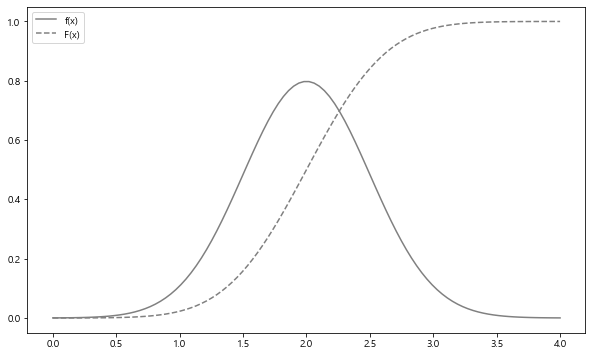

In [23]:
plot_prob(X,0,4)

In [24]:
rv = stats.norm(2,.5) # 분산이 0.5이므로 여기서의 표준편차는 0.25
print(rv.mean(),rv.var()) # 표준편차는 분산의 제곱근이니까~

2.0 0.25


In [25]:
# pp가 2일때 확률밀도
rv.pdf(2)

0.7978845608028654

In [26]:
# pp가 2일 때 하측확률(q)
rv.cdf(2)

0.5

In [27]:
# 상위 30% 지점을 구하기
rv.isf(0.3)

2.2622002563540207

In [28]:
# 90% 구간을 구하라
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [29]:
# 다른 방식으로 90% 구간을 구해보아라
(rv.isf(0.95), rv.isf(0.05)) # 상위 95% ~ 5% 구간

(1.1775731865242638, 2.8224268134757367)

### 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며, 확률변수가 취할 수 있는 값은 0 이상의 실수이다.
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며, $EX(\lambda)$로 표기한다.
- $EX(\lambda)$는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생간격에 따르는 확률분포이다.

In [30]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x>=0:
            return lam*np.exp(-lam*x)
        else: return 0
    return x_range, f

In [31]:
# 람다는 '단위시간 당 발생하는 사건의 건수'이며,
# 이 사건이 일어나는 횟수를 나타내는 푸아송 분포,
# 이 사건이 일어나기까지 걸리는 시간간격을 나타내는 게 지수분포
lam = 3
X = Ex(lam)
check_prob(X)

기댓값: 0.333
분산: 0.111


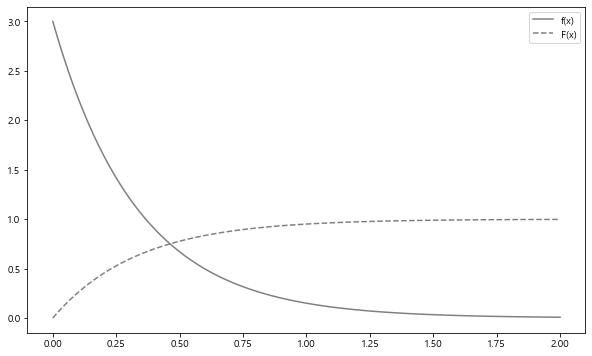

In [32]:
plot_prob(X,0,2)
# 실선이 밀도함수, 점선이 분포함수

In [ ]:
# 단, stats.expon() 함수로 지수분포를 사용할 때에는 파라미터를 1/lambda로 입력해야 함.

https://books.google.co.kr/books?id=-J_HDwAAQBAJ&pg=PA179&lpg=PA179&dq=%ED%95%98%EC%B8%A1%ED%99%95%EB%A5%A0+ppf&source=bl&ots=pg3FxOhKN8&sig=ACfU3U257SlF5ZdhOOHD4axjjEGx9EQmvA&hl=ko&sa=X&ved=2ahUKEwjMhZXEydH1AhWCEIgKHfC3BeEQ6AF6BAgCEAM#v=onepage&q=%ED%95%98%EC%B8%A1%ED%99%95%EB%A5%A0%20ppf&f=false

<br><br>
하측확률 관련 통계학 교과서 발췌

In [33]:
# [과제] 평균이 100, 표준편차가 10인 정규분포에서
# 하측확률이 0.3일 경우의 퍼센트포인트를 구하고
# 그 ppf를 적용하여 하측확률을 구하여라.

a = stats.norm.ppf(loc=100, scale=10, q=0.3)
display(a, stats.norm.cdf(loc=100, scale=10,x=a))

94.75599487291959

0.2999999999999998

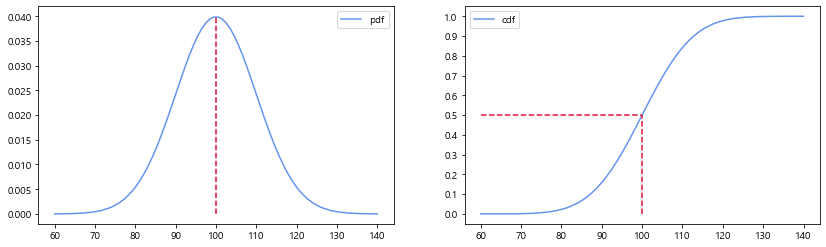

In [34]:
# [과제] 상기 정규분포의 확률밀도함수(pdf, 밀도함수)와 누적분포함수(cdf, 분포함수)를 시각화하여
# 하측확률과 ppf 간의 관계를 확인하세요

rv = stats.norm(loc=100, scale=10)
xrange = np.linspace(60,140,80) # 20부터 180까지 200개의 배열을 만들었다
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xrange,rv.pdf(xrange),color='cornflowerblue',label='pdf')
ax2.plot(xrange,rv.cdf(xrange),color='cornflowerblue',label='cdf')
ax2.vlines(100,0,0.5,color='crimson',linestyle='--')
ax2.hlines(0.5,60,100,color='crimson',linestyle='--')
ax1.vlines(100,0,0.04,color='crimson',linestyle='--')
ax2.set_yticks(np.linspace(0,1,11))
ax1.legend()
ax2.legend()
plt.show()

#display(integrate.quad(rv.pdf(100), rv.cdf(100)))

누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)0.7


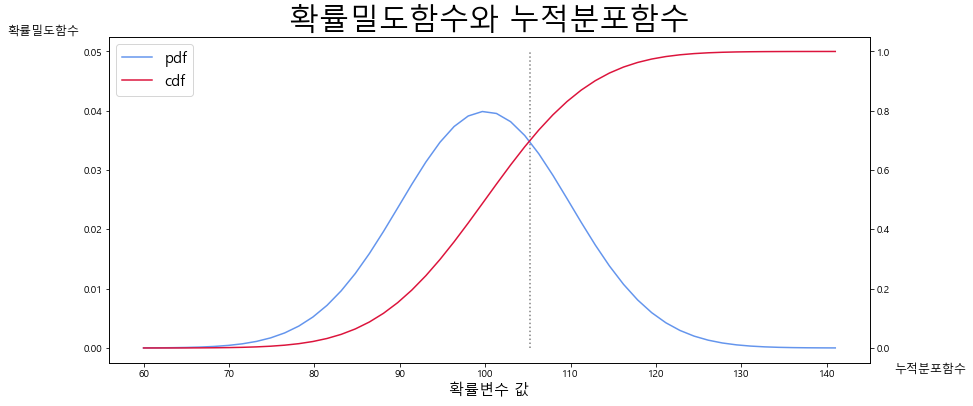

In [35]:
# 조남현님
a = float(input('누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)'))
rv = stats.norm(loc = 100,scale = 10)
xx = np.linspace(60,141)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('확률밀도함수',rotation=0,fontsize=12,loc='top')
ax1.set_xlabel('확률변수 값',fontsize=15)
ax1.vlines(rv.ppf(a),0,0.05,colors='gray',ls = ':')
lns1 = ax1.plot(xx,pdf,label='pdf',color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수',rotation=0,fontsize=12,loc='bottom')
lns2 = ax2.plot(xx,cdf,label='cdf',color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns,lab,loc='upper left',fontsize=15)

plt.title('확률밀도함수와 누적분포함수',fontsize=30)
plt.show()


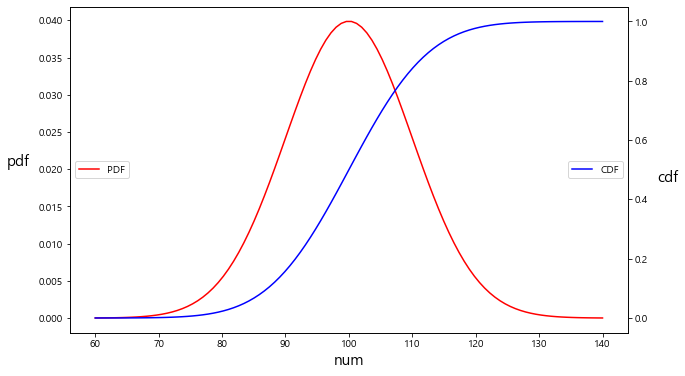

In [36]:
# 어정호님
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

rv = stats.norm(loc=100, scale=10)
xx = np.linspace(60,140,100)

pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

line_pdf = ax1.plot(xx,pdf,color='red',label='PDF')
ax1.set_xlabel('num',fontsize=15)
ax1.set_ylabel('pdf',rotation=0,fontsize=15,labelpad=20)

line_cdf = ax2.plot(xx,cdf,color='blue',label='CDF')
ax2.set_ylabel('cdf',rotation=0,fontsize=15,labelpad=20)

ax1.legend(loc='center left')
ax2.legend(loc='center right')
plt.show()


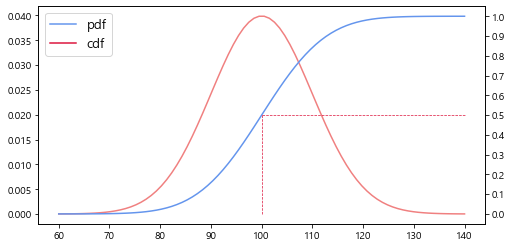

In [37]:
rv = stats.norm(loc=100, scale=10)
xrange = np.linspace(60,140,80) # 20부터 180까지 200개의 배열을 만들었다
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(xrange,rv.pdf(xrange),color='lightcoral', label='PDF')
ax2.plot(xrange,rv.cdf(xrange),color='cornflowerblue',label='CDF')
plt.vlines(100,0,0.5,color='crimson',linestyle='--',linewidth=0.7)
plt.hlines(0.5,100,140,color='crimson',linestyle='--',linewidth=0.7)
ax2.set_yticks(np.linspace(0,1,11))
ax1.legend(lns,lab,loc='upper left',fontsize=13)
plt.show()

In [38]:
rv = stats.norm(0,1)

<AxesSubplot:>

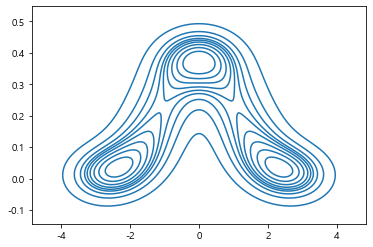

In [39]:
# [연습문제] 확률밀도함수와 누적분포함수를 하나의 그래프로 시각화하여 출력하세요.
# 단, seaborn을 사용할 것
xrange = np.linspace(-3,3,500)
sns.kdeplot(xrange,rv.pdf(xrange))

In [40]:
# [연습문제] 0까지의 누적분포
rv.cdf(0)

0.5

In [41]:
# [연습문제] 누적분포가 0.5인 X값
rv.ppf(0.5)

0.0

In [42]:
# [연습문제] 0~1까지의 누적확률분포
rv.cdf(1)-rv.cdf(0)

0.3413447460685429

In [43]:
# [연습문제] (-2<x<2) 확률
display(integrate.quad(rv.pdf, -2,2)[0],
       rv.cdf(2)-rv.cdf(-2))

0.9544997361036417

0.9544997361036416

In [44]:
# [연습문제] 상위 5% 확률의 퍼센트포인트
display(rv.ppf(0.95),
        rv.isf(0.05))

1.6448536269514722

1.6448536269514729

In [45]:
# [연습문제] 하위 5% 확률의 퍼센트포인트
display(rv.ppf(0.05),
        rv.isf(0.95))

-1.6448536269514729

-1.6448536269514722

In [46]:
# [연습문제] 하위 5%~상위 5%의 퍼센트포인트
rv.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

#### # [연습문제]
어느 회사에서 종업원들의 근무시간을 조사하였는데<br>종업원들의 근무기간 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다.<br>그렇다면 이 회사에서 14년 이상 근무한 종업원의 비율을 구하세요.

In [47]:
rv = stats.norm(11,4)
sample = rv.rvs(100000)
len(sample[sample>=14])/len(sample)

0.22678

In [48]:
rv1 = stats.norm(11,4)
1 - rv1.cdf(14)

0.22662735237686826

#### # [연습문제]
어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다.<br> 전구의 수명이 760일 이하일 확률을 구하세요.

In [49]:
rv = stats.norm(800,30)
rv.cdf(760)

0.09121121972586788

#### # [연습문제]
어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점, 분산이 64점인 정규분포를 따른다고 한다.<br>그렇다면 점수가 80점 이상이고 90점 이하일 확률을 구하여라.

In [50]:
# 분산이 64점이면 표준편차는 8이겠지요?
rv = stats.norm(70,8)
display(integrate.quad(rv.pdf, 80, 90)[0],
       rv.cdf(90)-rv.cdf(80))

0.09944010834107912

0.09944010834107919

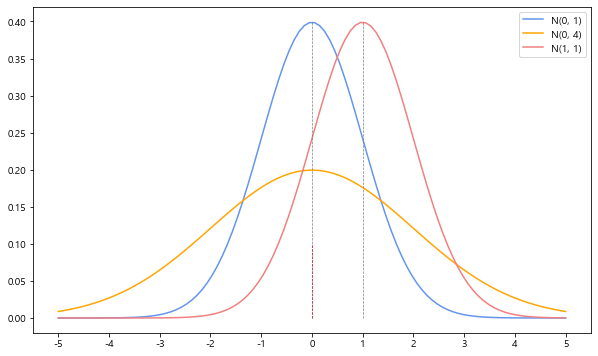

In [51]:
# [과제] N(mean, sigma**2) 파라미터를 각각 (0,1), (0,4), (1,1)로 변경할 때의 정규분포를
# 비교할 수 있도록 한 그래프에 넣어 시각화하세요.

def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/(np.sqrt(2*np.pi) * sigma)*np.exp(-((x-mu)**2)/(2*sigma**2))
    return x_range, f

para = [(0,1), (0,4), (1,1)]
color = ['cornflowerblue','orange','lightcoral']
xrange = np.linspace(-5,5,100)
plt.figure(figsize=(10,6))
for para, color in zip(para,color):
    m, s = para
    plt.plot(xrange, [N(m,np.sqrt(s))[1](x) for x in xrange], label=f'N{para}', color=color)
    
plt.legend()
plt.xticks(np.linspace(-5,5,11))
plt.vlines(0,0,0.4,color='gray',linestyle='--',linewidth=0.7)
plt.vlines(0,0,0.1,color='crimson',linestyle='--',linewidth=0.7)
plt.vlines(1,0,0.4,color='gray',linestyle='--',linewidth=0.7)
plt.show()

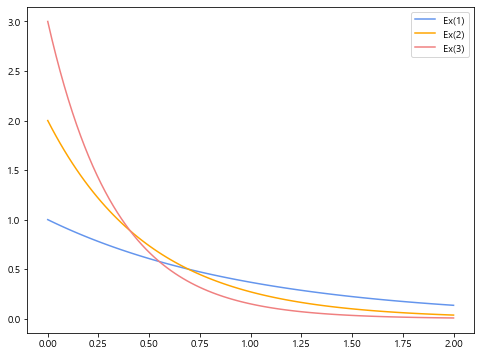

In [52]:
# [과제] 파라미터 𝜆가 1,2,3으로 증가할 때 지수함수의 확률분포를 시각화하세요.
xrange = np.linspace(0,2,100)
plt.figure(figsize=(8,6))
lamb = np.arange(1,4)
color = ['cornflowerblue','orange','lightcoral']
for i, j in zip(lamb,color):
    plt.plot(xrange, i*np.exp(-i*xrange),
             color = j, label=f'Ex({i})')
plt.legend()
plt.show()
# 단위시간당 발생하는 사건의 건수(λ)가 많아질수록 사건이 일어나기까지 걸리는 시간도 짧아진다.

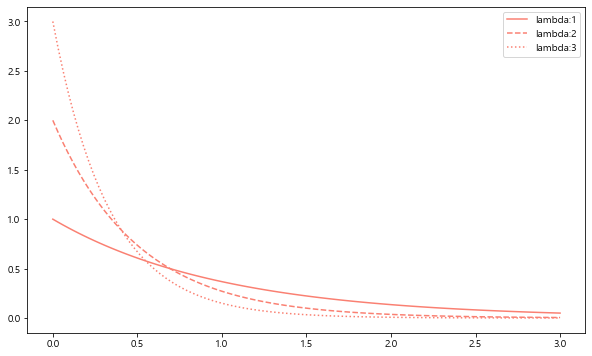

In [53]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam,ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale =1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}' , ls=ls, color="salmon")
ax.legend()
plt.show()
